# Emily Tseng (et397) - Ex5

## 1) Stylometrics

### A)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from collections import Counter

In [2]:
import nltk
from nltk.corpus import gutenberg

In [5]:
shakespeare = [fileid for fileid in gutenberg.fileids() if fileid.startswith('shakespeare')]
milton = [fileid for fileid in gutenberg.fileids() if fileid.startswith('milton')]

austen = [fileid for fileid in gutenberg.fileids() if fileid.startswith('austen')]
melville = [fileid for fileid in gutenberg.fileids() if fileid.startswith('melville')]

In [8]:
shw = [w.lower() for fileid in shakespeare for w in gutenberg.words(fileid) if w[0].isalpha()]
mpw = [w.lower() for w in gutenberg.words('milton-paradise.txt') if w[0].isalpha()]
apw = [w.lower() for w in gutenberg.words('austen-persuasion.txt') if w[0].isalpha()]
mdw = [w.lower() for w in gutenberg.words('melville-moby_dick.txt') if w[0].isalpha()]

In [9]:
mdw = mdw[:80000] #truncating moby dick to the first 80k words

In [12]:
fdist = Counter(shw + mpw + apw + mdw) #for all 4 authors
top50_2,_ = zip(*fdist.most_common(50)) #just use top 50 from combined
print(top50_2)

('the', 'and', 'of', 'to', 'in', 'a', 'i', 'that', 'his', 'with', 'it', 'he', 'not', 'but', 'as', 'was', 'for', 'be', 'all', 'you', 'is', 'her', 'had', 'him', 'this', 'my', 's', 'on', 'by', 'so', 'from', 'at', 'or', 'she', 'me', 'what', 'they', 'their', 'which', 'no', 'have', 'there', 'now', 'more', 'will', 'were', 'we', 'them', 'thou', 'when')


In [15]:
M2=[]
for corp in [shw, mpw, apw, mdw]:
  for i in range(0,len(corp)-4999,5000):  # 13 blocks of shakespeare, 16 of milton
    fdist = Counter(corp[i:i+5000])
    M2.append([fdist[w] for w in top50_2])
M2 = np.array(M2).astype(np.float64) #convert integers to floating point array
assert len(M2) == 61

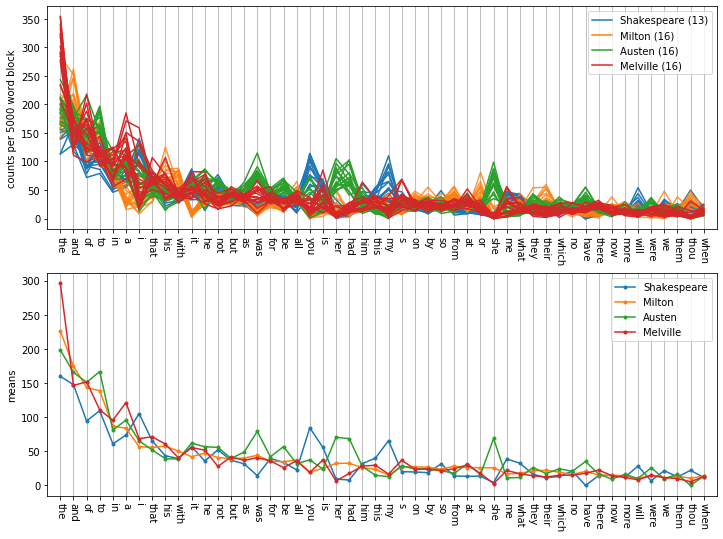

In [19]:
C = plt.rcParams['axes.prop_cycle'].by_key()['color'] #default colorcycle

def plot_format(ylab=''):
    plt.xticks(range(50), top50_2, rotation=270)
    plt.xlim(-1,50)
    plt.grid(axis='x')
    plt.ylabel(ylab)
    plt.legend()

plt.figure(figsize=(12,9))

plt.subplot(211)
plt.plot(M2[:13].T, C[0]) #shakespeare blocks in blue
plt.plot(M2[13:(13+16)].T, C[1], alpha=.8) #milton blocks in orange
plt.plot(M2[(13+16):(13+16+16)].T, C[2]) #austen blocks
plt.plot(M2[(13+16+16):].T, C[3]) #melville blocks
plt.plot([-1],[100],label='Shakespeare (13)') # points out of view
plt.plot([-1],[100],label='Milton (16)')      
plt.plot([-1],[100],label='Austen (16)')    
plt.plot([-1],[100],label='Melville (16)')      
plot_format('counts per 5000 word block')

plt.subplot(212)
plt.plot(M2[:13].mean(0), '.-', label='Shakespeare') #shakespeare blocks in blue
plt.plot(M2[13:].mean(0), '.-', label='Milton') #milton blocks in orange
plt.plot(M2[(13+16):(13+16+16)].mean(0), '.-', label='Austen') 
plt.plot(M2[(13+16+16):].mean(0), '.-', label='Melville') 
plot_format('means')

In [20]:
scaler2 = preprocessing.StandardScaler()
M2_scaled = scaler2.fit_transform(M2)

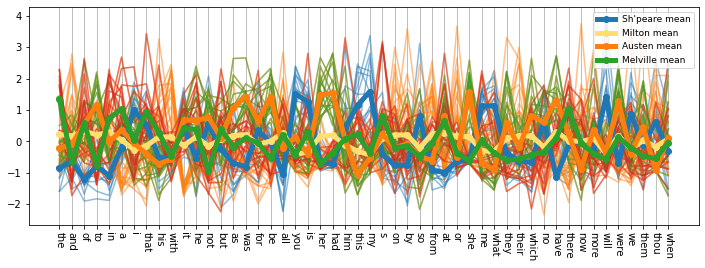

In [24]:
plt.figure(figsize=(12,4))
plt.plot(M2_scaled[:13].T, C[0], alpha=.5)
plt.plot(M2_scaled[13:].T, C[1], alpha=.5)
plt.plot(M2_scaled[(13+16):(13+16+16)].T, C[2], alpha=.5) #austen blocks
plt.plot(M2_scaled[(13+16+16):].T, C[3], alpha=.5) #melville blocks

plt.plot(M2_scaled[:13].mean(0),'o-', lw=5, label='Sh\'peare mean')
plt.plot(M2_scaled[13:].mean(0),'o-', lw=5, color='#ffdf6e', label='Milton mean')
plt.plot(M2_scaled[(13+16):(13+16+16)].mean(0), 'o-', lw=5, label='Austen mean') 
plt.plot(M2_scaled[(13+16+16):].mean(0), 'o-', lw=5, label='Melville mean') 

plt.grid(axis='x')
plt.legend(loc='upper right', fontsize=9)
plt.xticks(range(50), top50_2, rotation=270);

In [26]:
pca2 = PCA(n_components=3)
M2_new = pca2.fit_transform(M2_scaled)
evr=pca2.explained_variance_ratio_
print ('explained variance ratio:', evr, sum(evr))  #eigenvalues, scaled to sum to 1

explained variance ratio: [0.24456369 0.2162239  0.10819886] 0.5689864541888892


In [36]:
M2_new.shape

(61, 3)

In [27]:
from mpl_toolkits.mplot3d import Axes3D

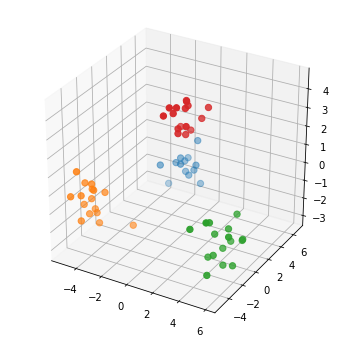

In [38]:
fig=plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*M2_new.T, s=40, c=[C[0]]*13 + [C[1]]*16 + [C[2]]*16 + [C[3]] *16)